Steps are
1. Load the full model at the end of the training from prms.pth
2. Perform dropout for specific fractions of the high/random/low Rayleigh Quotient neurons
3. For each iteration we are testing the 0-9, inputs and storing the prediction softmax weights
4. Graph a confusion matrix/confidence
5. Package it in an easy to understand way to explain it

In [3]:
import torch

results_path = "/Users/corwin/Building/results/alignment_stats/MLP/MNIST/Adam/results.pth"

model = torch.load(results_path)

if torch.cuda.is_available():
    model = model.cuda()
    


In [4]:
print(model)
%load_ext autoreload
%autoreload 2

{'prms': {'vals': ['MLP'], 'name': 'network', 'dataset': 'MNIST', 'dropout': 0, 'lr': 0.001, 'weight_decay': 0}, 'train_results': {'loss': tensor([[2.3112e+00],
        [2.2816e+00],
        [2.2466e+00],
        ...,
        [5.2225e-05],
        [6.0174e-05],
        [4.1390e-05]]), 'accuracy': tensor([[ 11.2305],
        [ 23.4375],
        [ 27.6367],
        ...,
        [100.0000],
        [100.0000],
        [100.0000]]), 'alignment': [tensor([[[0.0015, 0.0010, 0.0018,  ..., 0.0016, 0.0011, 0.0015],
         [0.0015, 0.0010, 0.0020,  ..., 0.0017, 0.0011, 0.0016],
         [0.0016, 0.0011, 0.0025,  ..., 0.0020, 0.0010, 0.0019],
         ...,
         [0.0103, 0.0117, 0.0066,  ..., 0.0102, 0.0098, 0.0146],
         [0.0106, 0.0106, 0.0064,  ..., 0.0100, 0.0088, 0.0145],
         [0.0102, 0.0101, 0.0070,  ..., 0.0095, 0.0081, 0.0144]]]), tensor([[[0.0073, 0.0078, 0.0091,  ..., 0.0108, 0.0186, 0.0095],
         [0.0093, 0.0078, 0.0081,  ..., 0.0113, 0.0154, 0.0117],
         [0.0102

In [5]:
import sys
sys.path.append('../..')
print(sys.path)

['/Users/corwin/Building/NeuroAI_Research/networkAlignmentAnalysis/notebooks/jupyter', '/Users/corwin/anaconda3/envs/mamba_env/lib/python311.zip', '/Users/corwin/anaconda3/envs/mamba_env/lib/python3.11', '/Users/corwin/anaconda3/envs/mamba_env/lib/python3.11/lib-dynload', '', '/Users/corwin/anaconda3/envs/mamba_env/lib/python3.11/site-packages', '../..']


In [6]:
from networkAlignmentAnalysis.train import test, progressive_dropout, dropout_analyze
from networkAlignmentAnalysis.utils import load_checkpoints
from networkAlignmentAnalysis.experiments.alignment_stats import AlignmentStatistics
from networkAlignmentAnalysis.datasets import get_dataset

model_path = "/Users/corwin/Building/results/alignment_stats/MLP/MNIST/Adam/checkpoint.tar"




expmt = AlignmentStatistics(args=['--network', 'MLP', '--epochs', '10', '--replicates', '1', '--use_prev'])


# load networks 
nets, optimizers, params = expmt.load_networks()

# load dataset
dataset = get_dataset(expmt.args.dataset,
                      build=True,
                      transform_parameters=nets[0],
                      device=expmt.args.device)


nets, optimizers, results = load_checkpoints(nets,optimizers,expmt.args.device,model_path)

print(nets)
print(optimizers) #need these for training

#nets, optimizers, device

print(model)

[MLP(
  (layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=784, out_features=100, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Linear(in_features=100, out_features=100, bias=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Linear(in_features=100, out_features=50, bias=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Linear(in_features=50, out_features=10, bias=True)
    )
  )
)]
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)]
{'prms': {'vals': ['MLP'], 'name': 'network', 'dataset': 'MNIST', 'dropout': 0, 'lr': 0.001, 'weight_decay': 0}, 'train_results': {'loss': tensor([[2.3112e+00],
        [2.2816e+00],
        [2.2466e+00],
   

In [7]:
list(results.keys())
print(results["epoch"])

99


In [8]:
print(nets[0].parameters)

<bound method Module.parameters of MLP(
  (layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=784, out_features=100, bias=True)
      (1): ReLU()
    )
    (1): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Linear(in_features=100, out_features=100, bias=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Linear(in_features=100, out_features=50, bias=True)
      (2): ReLU()
    )
    (3): Sequential(
      (0): Dropout(p=0, inplace=False)
      (1): Linear(in_features=50, out_features=10, bias=True)
    )
  )
)>


In [9]:
for name, param in nets[0].named_parameters():
    print(name, param.size())
    

layers.0.0.weight torch.Size([100, 784])
layers.0.0.bias torch.Size([100])
layers.1.1.weight torch.Size([100, 100])
layers.1.1.bias torch.Size([100])
layers.2.1.weight torch.Size([50, 100])
layers.2.1.bias torch.Size([50])
layers.3.1.weight torch.Size([10, 50])
layers.3.1.bias torch.Size([10])


In [10]:
len(nets)

1

In [11]:
model = nets
parameters = dict(
    train_set=False,
    num_epochs=expmt.args.epochs,
    alignment=not(expmt.args.no_alignment),
    delta_weights=expmt.args.delta_weights,
    frequency=expmt.args.frequency,
)

#just call train_networks, checks in the train function, number of complete. 
print(test(model,dataset,**parameters))
alignment = test(model,dataset,**parameters)["alignment"]

100%|██████████| 10/10 [00:01<00:00,  7.10it/s]


{'loss': [0.13935591652989388], 'accuracy': [tensor(98.0321)], 'alignment': [tensor([[[0.0109, 0.0108, 0.0074, 0.0105, 0.0066, 0.0211, 0.0138, 0.0138,
          0.0155, 0.0097, 0.0101, 0.0165, 0.0150, 0.0100, 0.0106, 0.0081,
          0.0181, 0.0186, 0.0115, 0.0112, 0.0134, 0.0223, 0.0081, 0.0111,
          0.0186, 0.0102, 0.0140, 0.0167, 0.0174, 0.0145, 0.0099, 0.0150,
          0.0070, 0.0192, 0.0143, 0.0117, 0.0246, 0.0122, 0.0178, 0.0098,
          0.0095, 0.0102, 0.0069, 0.0096, 0.0031, 0.0092, 0.0089, 0.0131,
          0.0207, 0.0078, 0.0074, 0.0107, 0.0149, 0.0120, 0.0175, 0.0091,
          0.0051, 0.0099, 0.0101, 0.0032, 0.0027, 0.0087, 0.0107, 0.0071,
          0.0140, 0.0026, 0.0096, 0.0122, 0.0071, 0.0211, 0.0134, 0.0133,
          0.0124, 0.0123, 0.0104, 0.0182, 0.0092, 0.0030, 0.0144, 0.0167,
          0.0121, 0.0071, 0.0120, 0.0091, 0.0090, 0.0170, 0.0069, 0.0142,
          0.0121, 0.0096, 0.0144, 0.0142, 0.0101, 0.0111, 0.0085, 0.0132,
          0.0160, 0.0093, 0.0087, 0

100%|██████████| 10/10 [00:00<00:00, 33.47it/s]


In [12]:
parameters = dict(num_drops=expmt.args.num_drops, by_layer=expmt.args.dropout_by_layer, train_set=False)
results = progressive_dropout(nets,dataset, alignment, **parameters)



100%|██████████| 10/10 [00:00<00:00, 27.74it/s]


In [13]:
print(results['progdrop_acc_high'])
print(results['progdrop_loss_high'])
print(results['dropout_fraction'])

tensor([[[74.3780],
         [45.9134],
         [29.8477],
         [18.1910],
         [ 9.2610],
         [ 5.2599],
         [10.1293],
         [16.2002],
         [10.2874]]])
tensor([[[1.6545],
         [2.3978],
         [2.3849],
         [2.3046],
         [2.2113],
         [2.2776],
         [2.2995],
         [2.3041],
         [2.3043]]])
tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000])


In [14]:
weight = nets[0].layers[0][0].weight
print(weight)

Parameter containing:
tensor([[-0.0530, -0.0303, -0.0355,  ..., -0.0134, -0.0465, -0.0256],
        [-0.0354, -0.0233, -0.0152,  ..., -0.0222, -0.0514, -0.0285],
        [ 0.0037,  0.0044, -0.0106,  ..., -0.0067, -0.0217, -0.0256],
        ...,
        [-0.0459, -0.0286,  0.0106,  ...,  0.0044,  0.0148,  0.0154],
        [-0.0298,  0.0274, -0.0129,  ...,  0.0309,  0.0263, -0.0329],
        [-0.0455,  0.0140, -0.0339,  ..., -0.0362, -0.0447, -0.0303]],
       requires_grad=True)


In [15]:
print(optimizers)

[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)]


expmt.args.device


In [16]:
alignment

[tensor([[[0.0104, 0.0112, 0.0070, 0.0106, 0.0059, 0.0206, 0.0140, 0.0151,
           0.0156, 0.0091, 0.0103, 0.0157, 0.0142, 0.0100, 0.0103, 0.0079,
           0.0175, 0.0165, 0.0100, 0.0126, 0.0141, 0.0220, 0.0081, 0.0101,
           0.0165, 0.0112, 0.0141, 0.0156, 0.0180, 0.0140, 0.0103, 0.0141,
           0.0068, 0.0199, 0.0143, 0.0127, 0.0243, 0.0114, 0.0187, 0.0089,
           0.0083, 0.0099, 0.0064, 0.0088, 0.0032, 0.0096, 0.0096, 0.0134,
           0.0196, 0.0076, 0.0077, 0.0114, 0.0148, 0.0116, 0.0153, 0.0094,
           0.0051, 0.0102, 0.0098, 0.0030, 0.0029, 0.0082, 0.0095, 0.0065,
           0.0158, 0.0026, 0.0087, 0.0122, 0.0071, 0.0197, 0.0136, 0.0134,
           0.0124, 0.0123, 0.0102, 0.0183, 0.0086, 0.0029, 0.0137, 0.0163,
           0.0120, 0.0073, 0.0119, 0.0088, 0.0096, 0.0166, 0.0072, 0.0136,
           0.0135, 0.0096, 0.0132, 0.0138, 0.0102, 0.0114, 0.0082, 0.0138,
           0.0152, 0.0097, 0.0083, 0.0140],
          [0.0115, 0.0113, 0.0070, 0.0112, 0.0063, 0.019

In [151]:
parameters = dict(num_drops=expmt.args.num_drops, by_layer=expmt.args.dropout_by_layer, train_set=False, dropout_fraction = 0.4, level = "high")
results = dropout_analyze(nets,dataset, alignment, **parameters)

100%|██████████| 10/10 [00:00<00:00, 37.82it/s]


In [152]:
parameters

{'num_drops': 9,
 'by_layer': False,
 'train_set': False,
 'dropout_fraction': 0.4,
 'level': 'high'}

In [153]:
label = results[1][0][0]
print(label)


tensor(5)


In [154]:
prediction = results[0][0][0]
print(prediction)


tensor([-1.7041, -0.6755, -1.4443, -0.2481,  0.4688,  0.4756,  0.6794, -1.2288,
         1.9595, -2.3173])


In [155]:
from torch import nn
criterion = nn.CrossEntropyLoss()
# compute losses:
losses = []
for i in range(len(results[0])):
    j_limit = len(results[0][0]) if i != 9 else 784
    for j in range(j_limit):
        prediction = results[0][i][j]
        label = results[1][i][j]
        loss = criterion(prediction, label)
        losses.append(loss.item())

print(len(losses))
average_loss = sum(losses) / len(losses)
print(average_loss)


10000
2.305160556901619


In [156]:
results[0][5][785]

tensor([-2.1152, -0.9717, -2.9860, -0.7198,  1.5548,  1.0160,  0.3904, -1.6981,
         2.0706, -2.2002])

In [157]:
predictions = []
for i in range(len(results[0])):
    j_limit = len(results[0][0]) if i != 9 else 784
    for j in range(j_limit):
        prediction = results[0][i][j]
        # print(torch.argmax(prediction, dim=1))
        max_index = torch.argmax(prediction)
        predictions.append(max_index.item())

In [158]:
# Compute a confusion matrix:
import torch
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

actual_labels = results[1]
flattened_labels = torch.cat([tensor.view(-1) for tensor in actual_labels], dim=0)
flattened_labels = flattened_labels.tolist()

# # Convert all_predictions to predicted class labels
predicted_labels = predictions

# Calculate accuracy
accuracy = accuracy_score(flattened_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

print(f"Average Loss: {average_loss}")

# Create confusion matrix
conf_matrix = confusion_matrix(flattened_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# Analyzing confidence (optional)
# If you're interested in analyzing the confidence of predictions, you could look at the max softmax probability
# For this example, we'll just calculate the average max probability across all predictions as a simple measure of confidence
softmax_outputs = results[0]
confidences = [torch.max(torch.softmax(batch, dim=1), dim=1).values for batch in softmax_outputs]
confidences = torch.cat(confidences).numpy()  # Concatenate all confidence scores
average_confidence = np.mean(confidences)
print(f"Average Confidence: {average_confidence}")


Accuracy: 0.1815
Average Loss: 2.305160556901619
Confusion Matrix:
 [[  1  34   0   5   1   7   1   4 927   0]
 [  0 272   0   0   0   1 150   0 712   0]
 [  0  45   0   0  13  13 185   2 774   0]
 [  0   3   0  44 135   8  58   0 762   0]
 [  0   0   0   0 132   4   3   0 843   0]
 [  0   6   0   5  31  52  83  11 704   0]
 [  0   0   0   0   9   6  57   0 886   0]
 [  0  50   0 173 106  34  89 301 275   0]
 [  0   4   0   0   5   0   9   0 956   0]
 [  0   0   0   6  28   1   4   0 970   0]]
Average Confidence: 0.44949400424957275


In [159]:
softmax_outputs = results[0]
actual_labels = results[1]

# Initialize dictionaries to store confidence sums and counts for each combination
confidence_sums = {(predicted_label, actual_label): 0.0 for predicted_label in range(10) for actual_label in range(10)}
confidence_counts = {(predicted_label, actual_label): 0 for predicted_label in range(10) for actual_label in range(10)}

# Calculate confidence sums and counts for each combination
for softmax_output, actual_label in zip(softmax_outputs, actual_labels):
    predicted_label = torch.argmax(softmax_output, dim=1)
    confidence = torch.max(torch.softmax(softmax_output, dim=1), dim=1).values
    for pred, actual, conf in zip(predicted_label, actual_label, confidence):
        confidence_sums[(pred.item(), actual.item())] += conf.item()
        confidence_counts[(pred.item(), actual.item())] += 1

# Calculate average confidence for each combination
average_confidences = {(pred, actual): confidence_sums[(pred, actual)] / confidence_counts[(pred, actual)] 
                      if confidence_counts[(pred, actual)] > 0 else 0.0 
                      for pred in range(10) for actual in range(10)}

# Print average confidences
for pred in range(10):
    for actual in range(10):
        print(f"Average Confidence for Predicted {pred} and Actual {actual}: {average_confidences[(pred, actual)]}")

Average Confidence for Predicted 0 and Actual 0: 0.15923456847667694
Average Confidence for Predicted 0 and Actual 1: 0.0
Average Confidence for Predicted 0 and Actual 2: 0.0
Average Confidence for Predicted 0 and Actual 3: 0.0
Average Confidence for Predicted 0 and Actual 4: 0.0
Average Confidence for Predicted 0 and Actual 5: 0.0
Average Confidence for Predicted 0 and Actual 6: 0.0
Average Confidence for Predicted 0 and Actual 7: 0.0
Average Confidence for Predicted 0 and Actual 8: 0.0
Average Confidence for Predicted 0 and Actual 9: 0.0
Average Confidence for Predicted 1 and Actual 0: 0.22417084653587901
Average Confidence for Predicted 1 and Actual 1: 0.3097453435663791
Average Confidence for Predicted 1 and Actual 2: 0.29174224966102175
Average Confidence for Predicted 1 and Actual 3: 0.2180555909872055
Average Confidence for Predicted 1 and Actual 4: 0.0
Average Confidence for Predicted 1 and Actual 5: 0.21680430074532828
Average Confidence for Predicted 1 and Actual 6: 0.0
Avera

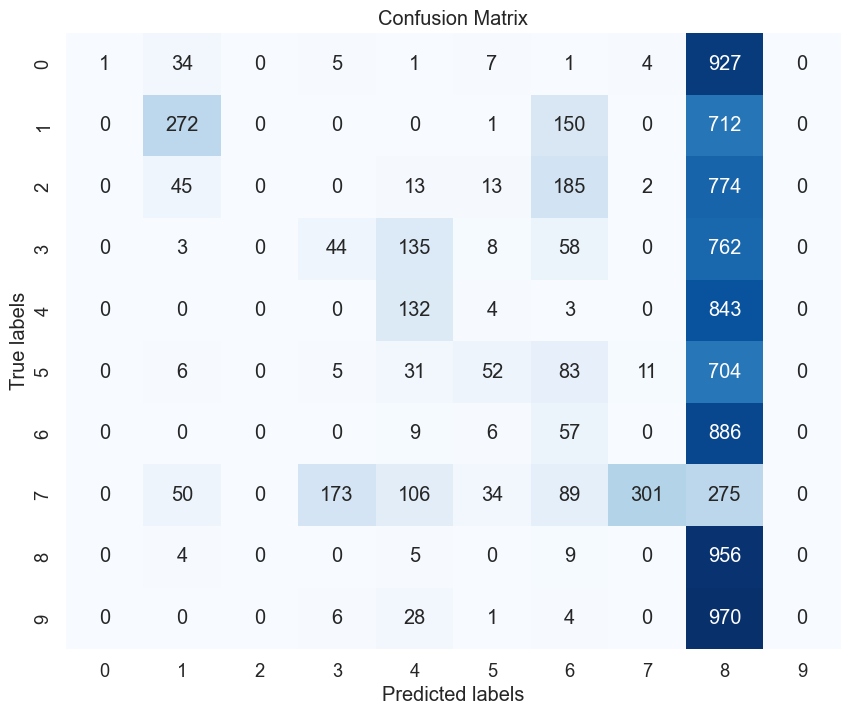

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [161]:
from tabulate import tabulate


# Prepare data for the table
data = [
    ["Accuracy", accuracy],
    ["Average Loss", average_loss],
    ["Average Confidence", average_confidence]
]

# Print table
print(tabulate(data, headers=["Metric", "Value"]))


Metric                 Value
------------------  --------
Accuracy            0.1815
Average Loss        2.30516
Average Confidence  0.449494


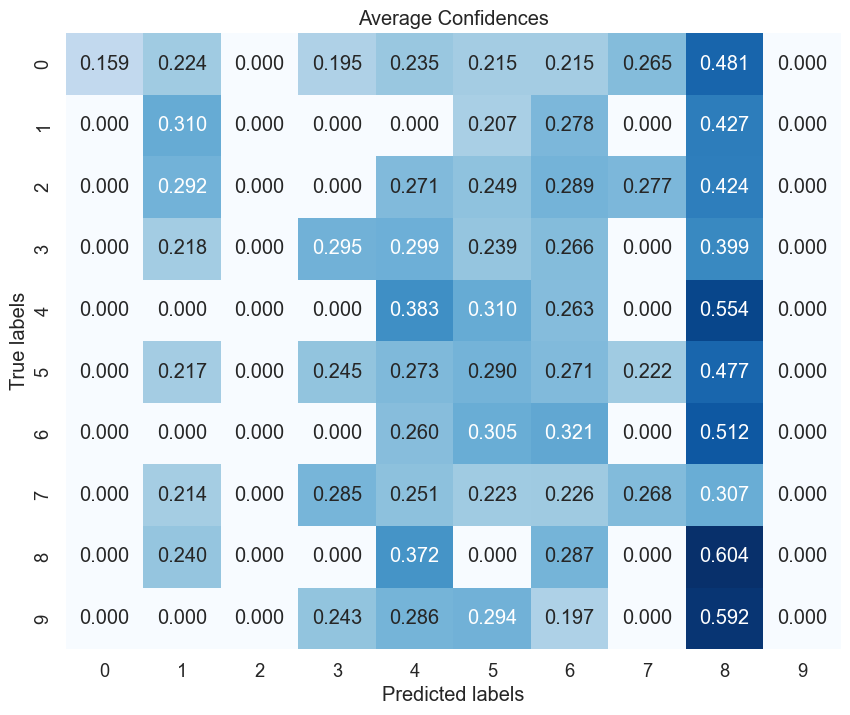

In [162]:
average_confidences_list = list(average_confidences.values())
average_confidences_array = np.array(average_confidences_list)
average_confidences_2d = average_confidences_array.reshape(10, 10)

average_confidences_2d_transposed = average_confidences_2d.T #the reshape swapped the axes

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(average_confidences_2d_transposed, annot=True, fmt='.3f', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Average Confidences')
plt.show()


AttributeError: 'dict' object has no attribute 'to_numpy'

In [98]:
predicted_labels

[6,
 4,
 2,
 5,
 9,
 6,
 3,
 8,
 9,
 5,
 9,
 6,
 1,
 4,
 7,
 7,
 6,
 5,
 5,
 8,
 6,
 8,
 4,
 4,
 6,
 2,
 6,
 9,
 1,
 7,
 8,
 8,
 8,
 6,
 1,
 8,
 1,
 8,
 5,
 2,
 6,
 5,
 7,
 8,
 1,
 3,
 5,
 8,
 1,
 5,
 8,
 6,
 2,
 2,
 1,
 1,
 5,
 9,
 2,
 2,
 7,
 1,
 8,
 1,
 6,
 3,
 9,
 2,
 6,
 9,
 7,
 5,
 6,
 7,
 5,
 8,
 3,
 8,
 6,
 8,
 7,
 4,
 1,
 5,
 4,
 3,
 7,
 2,
 5,
 9,
 8,
 3,
 3,
 9,
 8,
 8,
 4,
 8,
 2,
 1,
 7,
 8,
 3,
 8,
 8,
 3,
 7,
 3,
 7,
 1,
 7,
 3,
 8,
 8,
 5,
 2,
 6,
 7,
 3,
 2,
 9,
 5,
 4,
 5,
 8,
 1,
 6,
 3,
 4,
 2,
 1,
 2,
 5,
 5,
 3,
 8,
 6,
 8,
 6,
 6,
 6,
 3,
 1,
 7,
 2,
 5,
 8,
 9,
 8,
 5,
 1,
 4,
 9,
 2,
 1,
 5,
 4,
 9,
 5,
 1,
 2,
 1,
 5,
 7,
 8,
 1,
 5,
 6,
 6,
 4,
 6,
 7,
 8,
 8,
 6,
 7,
 5,
 3,
 7,
 4,
 4,
 2,
 8,
 5,
 1,
 8,
 3,
 3,
 5,
 5,
 5,
 1,
 1,
 3,
 7,
 8,
 4,
 7,
 7,
 2,
 2,
 8,
 9,
 5,
 7,
 1,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 9,
 5,
 9,
 9,
 1,
 3,
 2,
 9,
 9,
 7,
 6,
 8,
 3,
 5,
 2,
 1,
 1,
 7,
 5,
 4,
 8,
 1,
 4,
 6,
 2,
 8,
 3,
 1,
 2,
 5,
 2,
 7,
 5,
 4,
 4,
 8,
 8,


In [89]:
flattened_labels

[9,
 6,
 2,
 6,
 8,
 8,
 7,
 7,
 2,
 6,
 9,
 2,
 3,
 5,
 2,
 9,
 9,
 1,
 2,
 7,
 8,
 7,
 3,
 5,
 1,
 0,
 7,
 5,
 7,
 3,
 3,
 5,
 3,
 1,
 5,
 8,
 7,
 2,
 2,
 5,
 4,
 9,
 3,
 3,
 1,
 9,
 5,
 3,
 6,
 4,
 8,
 2,
 3,
 7,
 2,
 1,
 0,
 2,
 4,
 6,
 4,
 7,
 6,
 0,
 6,
 7,
 4,
 9,
 3,
 7,
 5,
 5,
 7,
 8,
 3,
 9,
 6,
 6,
 8,
 3,
 8,
 2,
 5,
 2,
 2,
 1,
 8,
 8,
 4,
 3,
 1,
 2,
 1,
 3,
 0,
 2,
 0,
 4,
 8,
 4,
 6,
 9,
 4,
 0,
 1,
 6,
 1,
 5,
 1,
 6,
 6,
 0,
 8,
 1,
 9,
 3,
 6,
 0,
 6,
 3,
 9,
 2,
 4,
 1,
 3,
 7,
 6,
 9,
 9,
 0,
 4,
 9,
 1,
 3,
 5,
 8,
 4,
 2,
 3,
 5,
 6,
 3,
 4,
 5,
 9,
 6,
 6,
 4,
 5,
 7,
 9,
 6,
 5,
 3,
 4,
 6,
 1,
 8,
 7,
 6,
 0,
 2,
 9,
 1,
 9,
 8,
 5,
 0,
 1,
 1,
 7,
 6,
 2,
 7,
 0,
 7,
 3,
 7,
 2,
 7,
 2,
 5,
 1,
 0,
 3,
 2,
 2,
 2,
 6,
 0,
 2,
 8,
 9,
 4,
 2,
 9,
 7,
 2,
 5,
 7,
 3,
 8,
 0,
 6,
 5,
 9,
 1,
 0,
 2,
 2,
 1,
 5,
 4,
 3,
 0,
 7,
 4,
 9,
 1,
 2,
 0,
 0,
 7,
 5,
 1,
 6,
 7,
 8,
 8,
 7,
 5,
 9,
 3,
 5,
 5,
 9,
 5,
 2,
 5,
 8,
 1,
 7,
 4,
 7,
 5,
 0,
 1,
 1,
 8,
 4,


In [184]:
len(flattened_predictions)

100000

In [20]:
print(results)

[tensor([[-0.3745, -2.3262, -3.5278,  ...,  1.6720, -2.5523,  0.1895],
        [-0.6327,  0.9235,  1.3650,  ...,  2.2498, -0.4120, -1.6476],
        [-5.6033, -3.9562, -6.5279,  ..., -4.2808,  4.1185, -5.9071],
        ...,
        [-6.3702, -1.7800, -6.4328,  ..., -0.0982,  2.0177, -6.7509],
        [-0.6779, -3.6415, -1.7517,  ..., -1.5739,  1.0337,  1.6083],
        [-2.3812, -0.1569, -0.6741,  ..., -1.8313,  2.7567, -4.0525]]), tensor([[-5.0462, -3.4615, -5.4467,  ..., -2.1679,  3.7091, -4.5656],
        [-0.5572, -3.3621, -2.4980,  ..., -1.1241,  0.7420,  2.0532],
        [-4.0644, -1.2016, -4.2479,  ..., -1.1077,  1.7677, -7.3451],
        ...,
        [-3.7324, -1.7416, -2.8766,  ..., -1.8525,  3.1166, -4.0580],
        [-1.6709, -3.0404, -4.9494,  ..., -1.4590,  1.1300, -2.3642],
        [-3.2404, -0.1071, -1.8386,  ..., -0.6942, -0.1601, -6.9533]]), tensor([[-5.1898, -3.1633, -5.0238,  ..., -2.5610,  2.5977, -8.2349],
        [-2.9698, -2.9658, -2.6690,  ..., -2.4332,  3.8262,

In [73]:
results[0][1][3][0]

tensor([-5.6532, -2.5014,  0.6101, -1.7115,  0.0401, -0.7982, -1.1551, -0.0308,
         4.3780,  0.6945])

In [74]:
results[0][0][0]

tensor([-5.6532, -2.5014,  0.6101, -1.7115,  0.0401, -0.7982, -1.1551, -0.0308,
         4.3780,  0.6945])

In [31]:
import os
print("Current directory:", os.getcwd())


Current directory: /Users/corwin/Building/NeuroAI_Research/networkAlignmentAnalysis/notebooks/jupyter
